In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Get the Mental Health dataset 
df1 = pd.read_excel('MHSDS_monthly/2019-12 MHSDS Monthly Performance Data.xlsx')
df2 = pd.read_excel('MHSDS_monthly/2020-01 MHSDS Monthly Performance Data.xlsx')
df3 = pd.read_excel('MHSDS_monthly/2020-02 MHSDS Monthly Performance Data.xlsx')
df4 = pd.read_excel('MHSDS_monthly/2020-03 MHSDS Monthly Performance Data.xlsx')
df5 = pd.read_excel('MHSDS_monthly/2020-04 MHSDS Monthly Performance Data.xlsx')
df6 = pd.read_excel('MHSDS_monthly/2020-05 MHSDS Monthly Performance Data.xlsx')
df7 = pd.read_excel('MHSDS_monthly/2020-06 MHSDS Monthly Performance Data.xlsx')
df8 = pd.read_excel('MHSDS_monthly/2020-07 MHSDS Monthly Performance Data.xlsx')
df9 = pd.read_excel('MHSDS_monthly/2020-08 MHSDS Monthly Performance Data.xlsx')
df10 = pd.read_excel('MHSDS_monthly/2020-09 MHSDS Monthly Performance Data.xlsx')
df11 = pd.read_excel('MHSDS_monthly/2020-10 MHSDS Monthly Performance Data.xlsx')
df12 = pd.read_excel('MHSDS_monthly/2020-11 MHSDS Monthly Performance Data.xlsx')
df13 = pd.read_excel('MHSDS_monthly/2020-12 MHSDS Monthly Performance Data.xlsx')
df14 = pd.read_excel('MHSDS_monthly/2021-01 MHSDS Monthly Performance Data.xlsx')
df15 = pd.read_excel('MHSDS_monthly/2021-02 MHSDS Monthly Performance Data.xlsx')
df16 = pd.read_excel('MHSDS_monthly/2021-03 MHSDS Monthly Performance Data.xlsx')
df17 = pd.read_excel('MHSDS_monthly/2021-04 MHSDS Monthly Performance Data.xlsx')
df18 = pd.read_excel('MHSDS_monthly/2021-05 MHSDS Monthly Performance Data.xlsx')
df19 = pd.read_excel('MHSDS_monthly/2021-06 MHSDS Monthly Performance Data.xlsx')
df20 = pd.read_excel('MHSDS_monthly/2021-07 MHSDS Monthly Performance Data.xlsx')
df21 = pd.read_excel('MHSDS_monthly/2021-08 MHSDS Monthly Performance Data.xlsx')
df22 = pd.read_excel('MHSDS_monthly/2021-09 MHSDS Monthly Performance Data.xlsx')
df23 = pd.read_excel('MHSDS_monthly/2021-10 MHSDS Monthly Performance Data.xlsx')
df24 = pd.read_excel('MHSDS_monthly/2021-11 MHSDS Monthly Performance Data.xlsx')
df25 = pd.read_excel('MHSDS_monthly/2021-12 MHSDS Monthly Performance Data.xlsx')
df26 = pd.read_excel('MHSDS_monthly/2022-01 MHSDS Monthly Performance Data.xlsx')
df27 = pd.read_excel('MHSDS_monthly/2022-02 MHSDS Monthly Performance Data.xlsx')

# Combine all the excel files
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
      df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
      df21, df22, df23, df24, df25, df26, df27])

##### MENTAL HEALTH DATASET PRE-PROCESSING

In [2]:
# Replace * in measure value into NaN and make it float datatype
df['MEASURE_VALUE'] = df['MEASURE_VALUE'].replace('*', np.nan)
df['MEASURE_VALUE'] = df['MEASURE_VALUE'].astype('float')

In [3]:
# Get the year and month of each data points to produce a "KEY"
df['REPORTING_PERIOD_END'] = pd.to_datetime(df['REPORTING_PERIOD_END'])
df['Year'] = df.REPORTING_PERIOD_END.dt.year
df['Month'] = df.REPORTING_PERIOD_END.dt.month

df['KEY'] = df['Year'].astype(str) + df['Month'].astype(str)

##### MONTHLY WEATHER DATASET PRE-PROCESSING

In [4]:
# Get the data and modify its column names
df_weather_daylight = pd.read_csv('London_Monthly_Daylight_Hours_Averages.csv', names=['Date', 'Daylight_Hours'], header=0)
df_weather_temp = pd.read_csv('London_Monthly_Temperature_Averages.csv', names=['Date', 'Average_Temperature'], header=0)

# Merge the monthly daylight hours and temperature in one dataframe.
df_weather = df_weather_daylight.merge(df_weather_temp, on = 'Date')

In [5]:
# Get the year and month of each data points to produce a "KEY"
df_weather['Date'] = pd.to_datetime(df_weather['Date'], format='%Y-%m-%d')
df_weather['Year'] = df_weather.Date.dt.year
df_weather['Month'] = df_weather.Date.dt.month

df_weather['KEY'] = df_weather['Year'].astype(str) + df_weather['Month'].astype(str)

In [6]:
# Merge the monthly weather and mental health dataset in one dataframe.
df_mhsds = df.merge(df_weather, on = ['KEY', 'Year', 'Month'])

In [7]:
df_mhsds

,REPORTING_PERIOD_START,REPORTING_PERIOD_END,STATUS,BREAKDOWN,PRIMARY_LEVEL,PRIMARY_LEVEL_DESCRIPTION,SECONDARY_LEVEL,SECONDARY_LEVEL_DESCRIPTION,MEASURE_ID,MEASURE_NAME,MEASURE_VALUE,Year,Month,KEY,Date,Daylight_Hours,Average_Temperature
0,2019-12-01,2019-12-31,Final,Provider,RKL,WEST LONDON NHS TRUST,NONE,NONE,MHS30c,Attended contacts with memory services team in...,995.0,2019,12,201912,2019-12-31,7.23,6.79
1,2019-12-01,2019-12-31,Final,Provider,RQY,SOUTH WEST LONDON AND ST GEORGE'S MENTAL HEALT...,NONE,NONE,MHS30c,Attended contacts with memory services team in...,995.0,2019,12,201912,2019-12-31,7.23,6.79
2,2019-12-01,2019-12-31,Final,Provider,RAT,NORTH EAST LONDON NHS FOUNDATION TRUST,18,NONE,ACC37,Proportion of people assigned to an adult MH c...,99.0,2019,12,201912,2019-12-31,7.23,6.79
3,2019-12-01,2019-12-31,Final,Provider,RQY,SOUTH WEST LONDON AND ST GEORGE'S MENTAL HEALT...,18,NONE,ACC37,Proportion of people assigned to an adult MH c...,99.0,2019,12,201912,2019-12-31,7.23,6.79
4,2019-12-01,2019-12-31,Final,Provider,RWK,EAST LONDON NHS FOUNDATION TRUST,NONE,NONE,MHS29a,Contacts with perinatal MH team in the Reporti...,985.0,2019,12,201912,2019-12-31,7.23,6.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173873,2021-01-10,2021-12-31,Performance,STP; Ethnicity (White British/Non-White British),QWE,South West London Health and Care Partnership,Non-white British,Non-white British,MHS107a,Percentage of adult and older adult acute admi...,88.0,2021,12,202112,2021-12-31,7.23,7.66
173874,2021-01-10,2021-12-31,Performance,STP; Ethnicity (White British/Non-White British),QWE,South West London Health and Care Partnership,White British,White British,MHS107a,Percentage of adult and older adult acute admi...,90.0,2021,12,202112,2021-12-31,7.23,7.66
173875,2021-01-10,2021-12-31,Performance,STP; Ethnicity (White British/Non-White British),QWE,South West London Health and Care Partnership,Missing/invalid,Missing/invalid,MHS107b,Percentage of adult and older adult acute admi...,41.0,2021,12,202112,2021-12-31,7.23,7.66
173876,2021-01-10,2021-12-31,Performance,STP; Ethnicity (White British/Non-White British),QWE,South West London Health and Care Partnership,Non-white British,Non-white British,MHS107b,Percentage of adult and older adult acute admi...,12.0,2021,12,202112,2021-12-31,7.23,7.66


##### CORRELATION MATRIX

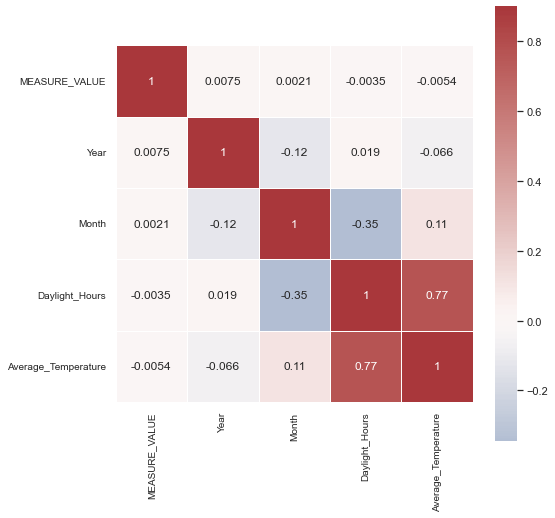

In [8]:
# Get Spearman Correlation Matrix
corrmat = df_mhsds.corr(method='spearman')
plt.rcParams["figure.figsize"] = (8,8)
sns. set(font_scale=1)
x = sns.heatmap(corrmat, annot=True,  cmap='vlag', center = 0,  vmax=.9, square=True, linewidths=1)
x.tick_params(labelsize=10)

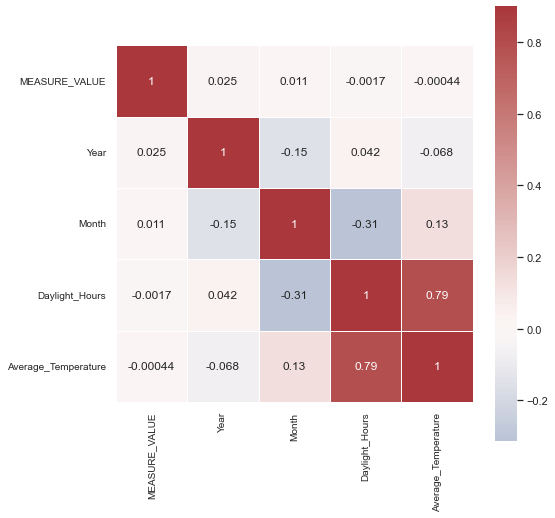

In [9]:
# Get Perason Correlation Matrix
corrmat = df_mhsds.corr(method='pearson')
corrmat
plt.rcParams["figure.figsize"] = (8,8)
sns. set(font_scale=1)
x = sns.heatmap(corrmat, annot=True,  cmap='vlag', center = 0,  vmax=.9, square=True, linewidths=1)
x.tick_params(labelsize=10)